In [3]:
#%matplotlib inline

from pylab import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from scipy.optimize import fsolve

mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rc('font',family='FreeSerif')
mpl.rc('xtick',labelsize=30)
mpl.rc('ytick',labelsize=30)

### Linestyles ###
colors={'red':(241/255.,88/255.,84/255.),\
        'orange':(250/255,164/255.,58/255.),\
        'pink':(241/255,124/255.,176/255.),\
        'brown':(178/255,145/255.,47/255.),\
        'purple':(178/255,118/255.,178/255.),\
        'green':(96/255,189/255.,104/255.),\
        'blue':(93/255,165/255.,218/255.),\
        'yellow':(222/255., 207/255., 63/255),\
        'black':(0.,0.,0.)}
collab = ['brown','green','blue','pink','black']
linewidth = [2,2,3,3,4]
linestyle = ['solid','dashed','dashdot','dotted','solid']

/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


[ 2.77301016  2.65210609]
True
(-9.2065149449351014e-14, 2.8421709430404007e-14)
0.0996015496346


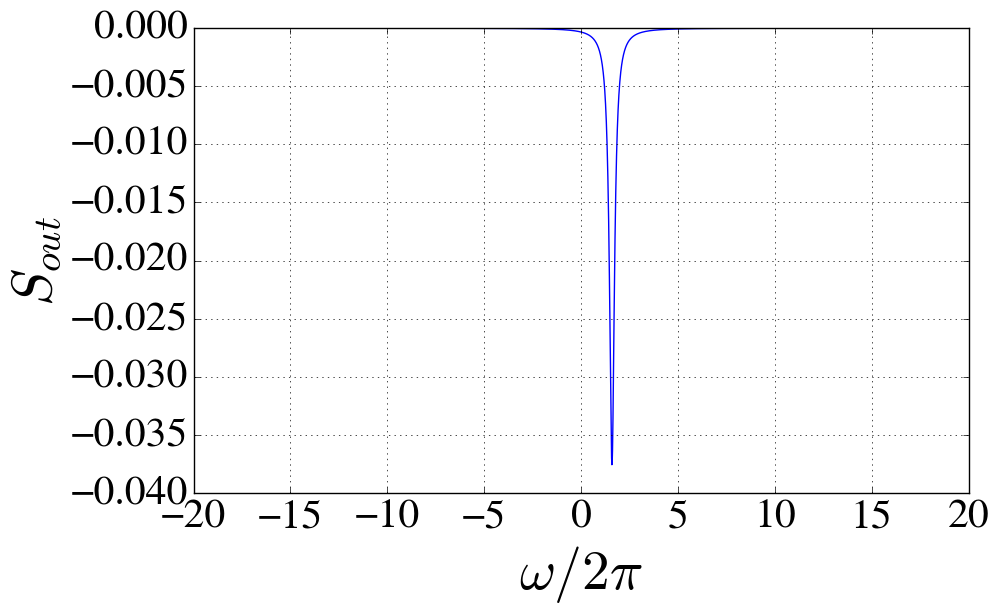

In [63]:
def squeez(kap,kap1k,kap2k,L100,chipk,chippk,Delk,ktau,phipi,Ek,thetpi):
    kap1  = kap1k*kap
    kap2  = kap2k*kap
    L     = L100/100.
    k     = np.sqrt(2*kap1*kap2*(1-L))
    chip  = chipk*kap
    chipp = chippk*kap
    Del   = Delk*kap
    tau   = ktau/kap
    phi   = phipi*np.pi
    
    #Determining the steady state solution
    E     = Ek*kap
    theta = thetpi*pi
    def steadystate(al0):
        al0r,al0i = al0
        fr = -kap*al0r + Del*al0i - 2*(al0r**2+al0i**2)*(chip*al0r-chipp*al0i) - \
        k*( np.cos(phi)*al0r-np.sin(phi)*al0i )
        fi = -kap*al0i - Del*al0r - 2*(al0r**2+al0i**2)*(chip*al0i+chipp*al0r) - E - \
        k*( np.cos(phi)*al0i+np.sin(phi)*al0r )
        return fr,fi
    al0r,al0i = fsolve(steadystate,(5,5))
    print(np.abs(np.array(steadystate(np.array([al0r,al0i])))))
    print(np.any(np.abs(np.array(steadystate(np.array([al0r,al0i]))))>10**(-8)))
    if np.any(np.abs(np.array(steadystate(np.array([al0r,al0i]))))>10**(-8)):
        al0r,al0i = fsolve(steadystate,(0,0))
    print(steadystate(np.array([al0r,al0i])))
    al0abs = np.sqrt(al0r**2+al0i**2)
    print(al0abs)
    psi   = np.arctan(al0i/al0r)*2
    eps   = -2*(chip+1j*chipp)*(al0r**2+al0i**2) 
    
    nu  = np.linspace(-40,40,10000)*2*np.pi
    f2  = ( np.sqrt(2*kap1*(1-L))*np.exp(1j*(nu*tau+phi))+np.sqrt(2*kap2k) )/np.sqrt(2*kap)
    f1  = ( np.sqrt(2*kap2*(1-L))*np.exp(1j*(nu*tau+phi))+np.sqrt(2*kap1k) )/np.sqrt(2*kap)
    dp  = 2*np.conjugate(eps)-kap-k*np.exp(1j*(nu*tau-phi))+1j*(nu+Del)
    dm  = 2*eps-kap-k*np.exp(1j*(nu*tau-phi))+1j*(nu+Del)
    Lam = dp*dm - np.abs(eps)**2
    M2  = 2*kap*f1*f2*dp + np.sqrt(1-L)*np.exp(1j*(nu*tau+phi))*Lam
    N2  = np.sqrt(L)*( np.sqrt(4*kap*kap1)*f1*dp + Lam )
    
    spec = 1/np.abs(Lam)**2 * ( np.abs(M2)**2 + np.abs(N2)**2 + \
                               2*kap*np.abs(eps)**2*(2*kap*np.abs(f2)**2+2*kap1*L)*np.abs(f1)**2 -\
                               np.sqrt(2*kap)*2*np.real(eps*np.exp(1j*(psi-theta))*f1*\
                                                        (M2*np.sqrt(2*kap)*np.conjugate(f2)+np.sqrt(2*kap1*L)*N2)) )
    logspec = 10*np.log10(spec)
    
    plt.figure(figsize = (10,6))
    plt.grid(True)
    plt.xlabel("$\omega/2\pi$",fontsize=40)
    plt.ylabel("$S_{out}$",fontsize=40)
    plt.plot(nu/2/np.pi,np.real(logspec))
    plt.xlim(-20,20)
    plt.show()
    
squeez(1,1,0,0,0,.5,-10,.0,0,1,0)

In [64]:
#interactive setup
interact(squeez,kap=(0.0,1.0,0.01),kap1k=(0.0,1.0,0.01),kap2k=(0.0,1.0,0.01),L100=(0,100,1),chipk=(0.0,1.0,0.01),\
             chippk=(0.0,2.0,0.01),Delk=(-20.0,20.0,0.01),ktau=(0.0,2.0,0.001),phipi=(0.0,2.0,0.001),\
             Ek=(0.0,20.0,0.1),thetpi=(0.0,2.0,0.01))
#show sliders


interactive(children=(FloatSlider(value=0.5, description='kap', max=1.0, step=0.01), FloatSlider(value=0.5, description='kap1k', max=1.0, step=0.01), FloatSlider(value=0.5, description='kap2k', max=1.0, step=0.01), IntSlider(value=50, description='L100'), FloatSlider(value=0.5, description='chipk', max=1.0, step=0.01), FloatSlider(value=1.0, description='chippk', max=2.0, step=0.01), FloatSlider(value=0.0, description='Delk', max=20.0, min=-20.0, step=0.01), FloatSlider(value=1.0, description='ktau', max=2.0, step=0.001), FloatSlider(value=1.0, description='phipi', max=2.0, step=0.001), FloatSlider(value=10.0, description='Ek', max=20.0), FloatSlider(value=1.0, description='thetpi', max=2.0, step=0.01), Output()), _dom_classes=('widget-interact',))

<function __main__.squeez>

In [ ]:
    def h(p, q):
    return (p, q)
interact(h, p=5, q=fixed(20));

## TEST

In [2]:
import matplotlib.pyplot as plt
from ipywidgets import interact

def f(n):
    plt.plot([0,1,2],[0,1,n])
    plt.show()
interact(f,n=(0,10))

interactive(children=(IntSlider(value=5, description='n', max=10), Output()), _dom_classes=('widget-interact',))

<function __main__.f>